# Optimizer policy experiments

In [1]:
import os
import sys
import math

import numpy as np

import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
import torchvision
import torchvision.datasets as datasets

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
assert "cuda" in str(device)
torch.backends.cudnn.benchmark = True
print(device)

cuda:0


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pytoune.framework.policies import (
    TrainPolicy,
    Phase,
)

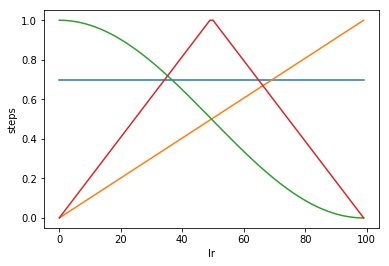

In [5]:
fig, ax = plt.subplots()

steps = 100

Phase(steps, lr=.7).plot(ax=ax)
Phase(steps, lr=(0, 1)).plot(ax=ax)
Phase(steps, lr=(1, 0, "cos")).plot(ax=ax)
Phase(100, lr=(0, 1, "tri")).plot(ax=ax)

# Build complex policies from basic ones
Just chain them together.

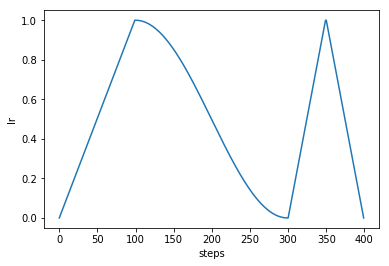

In [6]:
tp = TrainPolicy([
    Phase(100, lr=(0, 1)),
    Phase(200, lr=(1, 0, "cos")),
    Phase(100, lr=(0, 1, "tri")),
])

tp.plot()

# Use already defined complex policies

They are just a list of phases.

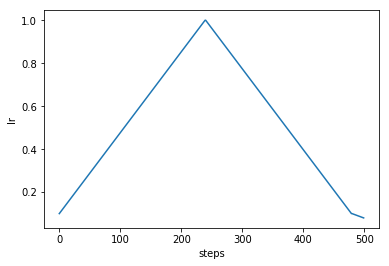

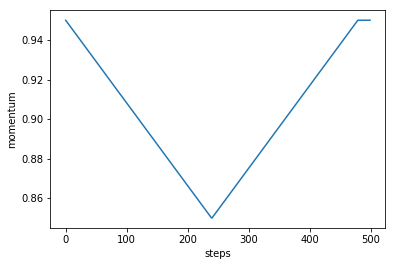

In [7]:
from pytoune.framework.policies import one_cycle_phases

tp = TrainPolicy([
    *one_cycle_phases(steps=500),
])
tp.plot()
tp.plot("momentum")

And here is the sgdr policy.

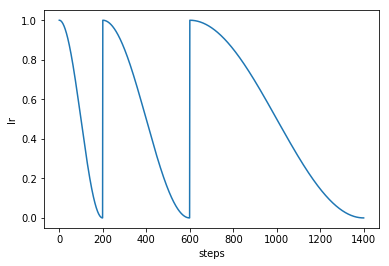

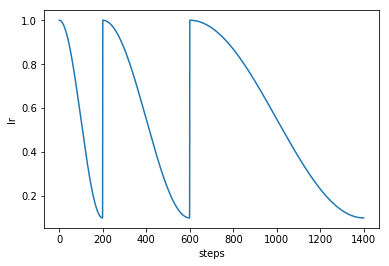

In [8]:
from pytoune.framework.policies import sgdr_phases

tp = TrainPolicy([
    Phase(200, lr=(1, 0, "cos")),
    Phase(400, lr=(1, 0, "cos")),
    Phase(800, lr=(1, 0, "cos")),
])
tp.plot()

tp = TrainPolicy([
    *sgdr_phases(200, 3),
])
tp.plot()

# Set the Optimizer for a phase
It would also be easy to extend the interface to set different optimizers in each phase.

```python
import torch.optim as optim

tp = TrainPolicy([
    Phase(steps=100,
          init_optimizer=lambda pytorch_model: optim.Adam(pytorch_model.parameters()),
          lr=(1, 0.1))
])
```